# PyTorch for CIFAR10
We test VGG classifier.
First init some basic environment.

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# VGG16 classifier

In [25]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history
from classifiers.vgg import VGG16

vgg = VGG16()
print(vgg)

_VGG(
  (layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

# train

In [26]:
%%time
opt = optim.SGD(vgg.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=True)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(vgg, opt, loss_fn)
# reduce_lr = lambda epoch: 0.5 ** (epoch // 50)
# lr_scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=[reduce_lr])
# scheduler = optim.lr_scheduler.MultiStepLR(opt, milestones=[80, 130], gamma=0.1)
# lr_scheduler = None
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5)
history = solver.train(epochs=150, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/150, lr:1.00e-01
[##################################################] 100.00% loss:2.1 acc:18.51% val_loss:1.9 val_acc:23.84%
Epoch: 2/150, lr:1.00e-01
[##################################################] 100.00% loss:1.6 acc:37.38% val_loss:1.5 val_acc:45.62%
Epoch: 3/150, lr:1.00e-01
[##################################################] 100.00% loss:1.2 acc:55.11% val_loss:1.4 val_acc:52.72%
Epoch: 4/150, lr:1.00e-01
[##################################################] 100.00% loss:0.97 acc:65.52% val_loss:1.0 val_acc:66.52%
Epoch: 5/150, lr:1.00e-01
[##################################################] 100.00% loss:0.82 acc:71.57% val_loss:0.83 val_acc:71.18%
Epoch: 6/150, lr:1.00e-01
[##################################################] 100.00% loss:0.72 acc:75.45% val_loss:1.0 val_acc:67.22%
Epoch: 7/150, l

[##################################################] 100.00% loss:0.013 acc:99.59% val_loss:0.38 val_acc:92.18%
Epoch: 60/150, lr:1.25e-02
[##################################################] 100.00% loss:0.012 acc:99.62% val_loss:0.38 val_acc:92.30%
Epoch: 61/150, lr:1.25e-02
[##################################################] 100.00% loss:0.011 acc:99.64% val_loss:0.39 val_acc:92.30%
Epoch: 62/150, lr:1.25e-02
[##################################################] 100.00% loss:0.0099 acc:99.66% val_loss:0.38 val_acc:92.16%
Epoch: 63/150, lr:1.25e-02
[##################################################] 100.00% loss:0.011 acc:99.63% val_loss:0.37 val_acc:92.62%
Epoch: 64/150, lr:1.25e-02
[##################################################] 100.00% loss:0.01 acc:99.64%% val_loss:0.37 val_acc:92.30%
Epoch: 65/150, lr:1.25e-02
[##################################################] 100.00% loss:0.01 acc:99.67%% val_loss:0.38 val_acc:92.22%
Epoch: 66/150, lr:1.25e-02
[#########################

[##################################################] 100.00% loss:0.0014 acc:99.97% val_loss:0.39 val_acc:92.94%
Epoch: 118/150, lr:3.91e-04
[##################################################] 100.00% loss:0.0016 acc:99.95% val_loss:0.39 val_acc:92.98%
Epoch: 119/150, lr:3.91e-04
[##################################################] 100.00% loss:0.0015 acc:99.97% val_loss:0.39 val_acc:92.86%
Epoch: 120/150, lr:3.91e-04
[##################################################] 100.00% loss:0.0015 acc:99.98% val_loss:0.39 val_acc:93.06%
Epoch: 121/150, lr:3.91e-04
[##################################################] 100.00% loss:0.0015 acc:99.97% val_loss:0.39 val_acc:93.02%
Epoch: 122/150, lr:3.91e-04
[##################################################] 100.00% loss:0.0015 acc:99.97% val_loss:0.39 val_acc:92.94%
Epoch: 123/150, lr:1.95e-04
[##################################################] 100.00% loss:0.0014 acc:99.97% val_loss:0.39 val_acc:92.98%
Epoch: 124/150, lr:1.95e-04
[############

# plot loss history
We check the classifier by plotting the loss and acc.

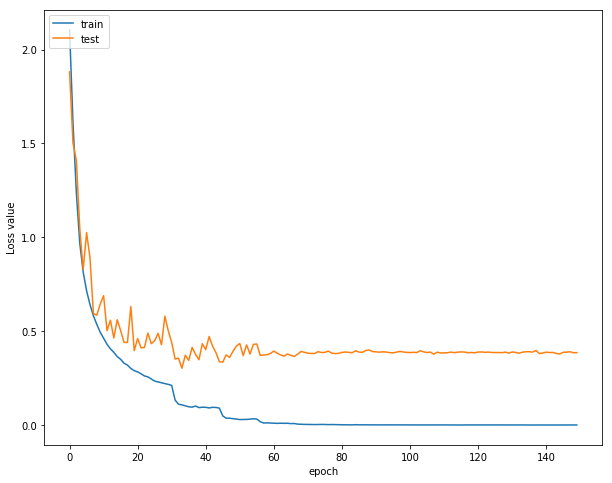

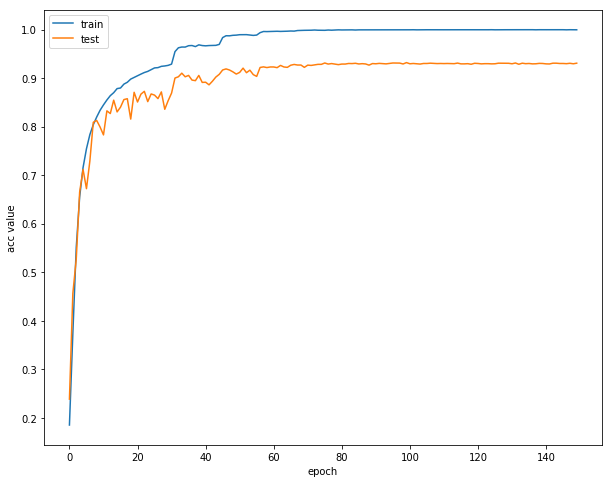

In [27]:
plot_history(history)

# test classifier
test on test data

In [28]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.4} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.3863 test_acc:93.08%
